In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np


In [161]:
column_names = ['times_pregnant', 'plasma_glucose', 'blood_pressure', 'triceps_skin', 'serum_insulin', 'body_mass_index', 'diabetes_pedigree_function', 'age', 'class_variable']
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url, names=column_names)

In [162]:
df.head()

,times_pregnant,plasma_glucose,blood_pressure,triceps_skin,serum_insulin,body_mass_index,diabetes_pedigree_function,age,class_variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


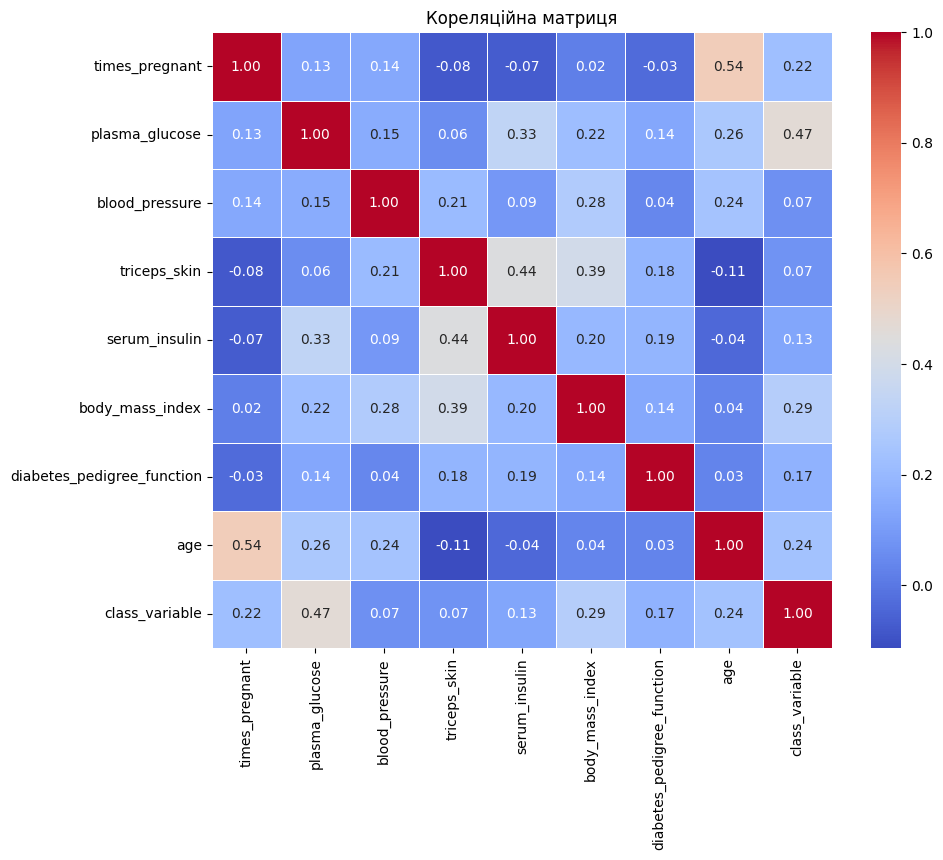

In [163]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

In [164]:
# Розділення датасету на тренувальний та валідаційний набори
X_train, X_val, y_train, y_val = train_test_split(df[['times_pregnant', 'plasma_glucose', 'body_mass_index', 'age']], 
                                                  df['class_variable'], 
                                                  test_size=0.3, 
                                                  random_state=42)


scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_val)



In [165]:
# Тренування моделі логістичної регресії
model = LogisticRegression()
model.fit(X_train_normalized, y_train)

# Прогнозування класів для валідаційних даних
y_pred = model.predict(X_test_normalized)

# Оцінка точності моделі
accuracy = accuracy_score(y_val, y_pred)
print("Точність моделі логістичної регресії на валідаційному наборі:", accuracy)

Точність моделі логістичної регресії на валідаційному наборі: 0.7402597402597403


2

In [166]:
walk_accel_data = pd.read_csv('walk/Accelerometer.csv')
walk_gyro_data = pd.read_csv('walk/Gyroscope.csv')

run_accel_data = pd.read_csv('run/Accelerometer.csv')
run_gyro_data = pd.read_csv('run/Gyroscope.csv')

squat_accel_data = pd.read_csv('squat/Accelerometer.csv')
squat_gyro_data = pd.read_csv('squat/Gyroscope.csv')

In [167]:
# Позначення колонок для гіроскопа та акселерометра
walk_accel_data.columns = [f'accel_{col}' for col in walk_accel_data.columns]
walk_gyro_data.columns = [f'gyro_{col}' for col in walk_gyro_data.columns]

run_accel_data.columns = [f'accel_{col}' for col in run_accel_data.columns]
run_gyro_data.columns = [f'gyro_{col}' for col in run_gyro_data.columns]

squat_accel_data.columns = [f'accel_{col}' for col in squat_accel_data.columns]
squat_gyro_data.columns = [f'gyro_{col}' for col in squat_gyro_data.columns]

# Об'єднання даних в один датасет
walk_data = pd.concat([walk_accel_data, walk_gyro_data], axis=1)
run_data = pd.concat([run_accel_data, run_gyro_data], axis=1)
squat_data = pd.concat([squat_accel_data, squat_gyro_data], axis=1)

# Додавання стовпця з міткою для класу активності
walk_data['activity'] = '0'
run_data['activity'] = '1'
squat_data['activity'] = '2'

# Об'єднання всіх даних в один датасет
all_data = pd.concat([walk_data, run_data, squat_data], ignore_index=True)


all_data.head()

,accel_time,accel_seconds_elapsed,accel_z,accel_y,accel_x,gyro_time,gyro_seconds_elapsed,gyro_z,gyro_y,gyro_x,activity
0,1.710738e+18,0.297091,0.000000,0.000000,0.000000,1710737800444874200,0.300874,0.545563,0.491198,1.057453,0
1,1.710738e+18,0.354975,0.198684,0.781952,-0.352732,1710737800478207200,0.334207,0.419499,0.096743,0.097583,0
2,1.710738e+18,0.412859,0.568994,-0.512807,-0.047651,1710737800511540200,0.367540,0.541134,-0.485089,-0.245561,0
3,1.710738e+18,0.470744,1.105880,-0.558323,-1.035443,1710737800544873200,0.400873,0.481500,-1.089446,-0.071622,0
4,1.710738e+18,0.528628,0.481292,-2.411216,-1.289307,1710737800578206200,0.434206,0.100637,-1.012708,-0.643909,0


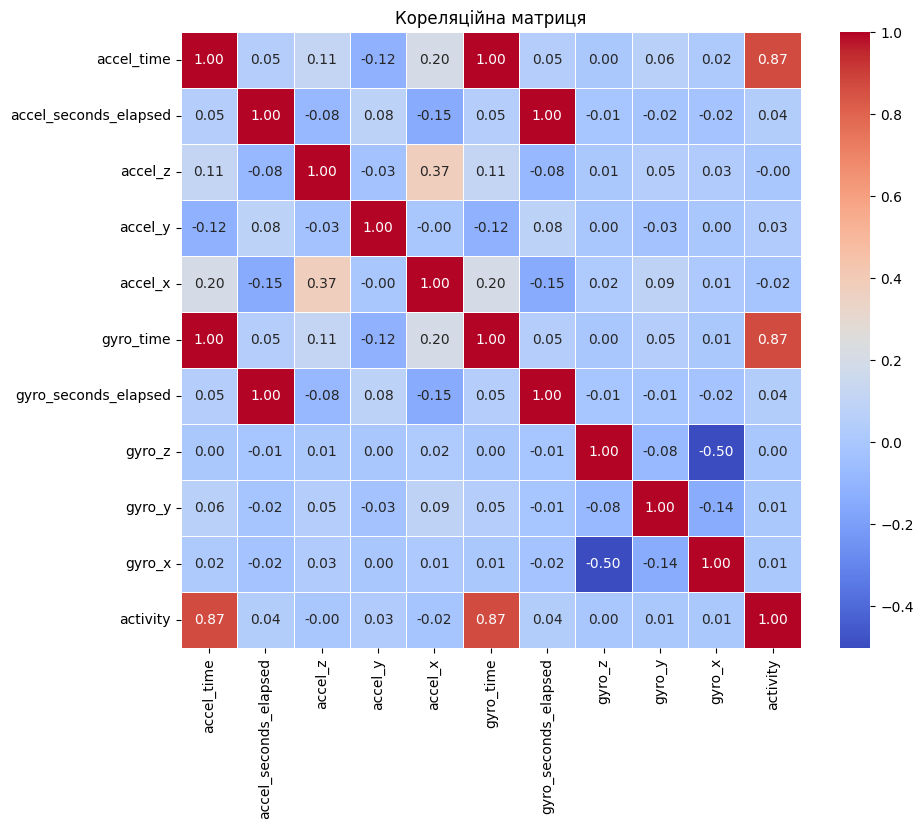

In [168]:
corr = all_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

In [169]:
# Функція для обчислення середнього квадратичного відхилення в межах вікна
def calculate_std_within_window(window):
    return np.std(window)

# Функція для обчислення середнього арифметичного значення колонки activity в межах вікна
def calculate_mean_activity_within_window(window):
    return round(np.mean(window))

# Розділення датасету на вікна по 30 рядків
window_size = 30
num_windows = len(all_data) // window_size
windows = [all_data.iloc[i*window_size:(i+1)*window_size] for i in range(num_windows)]

# Створення списків для зберігання даних
accel_z_std_list = []
accel_y_std_list = []
accel_x_std_list = []
gyro_z_std_list = []
gyro_y_std_list = []
gyro_x_std_list = []
activity_list = []

# Обчислення середнього квадратичного відхилення та середнього арифметичного для кожного вікна
for window in windows:
    accel_z_std = calculate_std_within_window(window['accel_z'])
    accel_y_std = calculate_std_within_window(window['accel_y'])
    accel_x_std = calculate_std_within_window(window['accel_x'])
    gyro_z_std = calculate_std_within_window(window['gyro_z'])
    gyro_y_std = calculate_std_within_window(window['gyro_y'])
    gyro_x_std = calculate_std_within_window(window['gyro_x'])
    
    window['activity'] = pd.to_numeric(window['activity'])
    activity = calculate_mean_activity_within_window(window['activity'])
    
    accel_z_std_list.append(accel_z_std)
    accel_y_std_list.append(accel_y_std)
    accel_x_std_list.append(accel_x_std)
    gyro_z_std_list.append(gyro_z_std)
    gyro_y_std_list.append(gyro_y_std)
    gyro_x_std_list.append(gyro_x_std)
    activity_list.append(activity)

# Створення нового датасету з обчисленими значеннями
new_data = pd.DataFrame({
    'accel_z_std': accel_z_std_list,
    'accel_y_std': accel_y_std_list,
    'accel_x_std': accel_x_std_list,
    'gyro_z_std': gyro_z_std_list,
    'gyro_y_std': gyro_y_std_list,
    'gyro_x_std': gyro_x_std_list,
    'activity': activity_list
})

new_data.head()

C:\Users\portf\AppData\Local\Temp\ipykernel_24588\2001270299.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window['activity'] = pd.to_numeric(window['activity'])


,accel_z_std,accel_y_std,accel_x_std,gyro_z_std,gyro_y_std,gyro_x_std,activity
0,2.531100,2.974742,4.084056,1.665416,2.498629,1.085324,0
1,1.517441,2.107559,3.287864,0.868122,0.807727,0.629726,0
2,1.124450,2.588262,3.422914,0.810813,1.247175,1.093674,0
3,1.313172,2.613020,3.374478,1.253875,1.089604,0.834537,0
4,1.211401,2.837983,3.134754,1.059642,1.078867,0.813462,0


In [170]:
# Видалення рядків зі значеннями NaN
new_data.dropna(inplace=True)

# Поділ даних на тренувальну та валідаційну вибірку
X_train, X_val, y_train, y_val = train_test_split(new_data[['accel_z_std', 'accel_y_std', 'accel_x_std', 'gyro_z_std', 'gyro_y_std', 'gyro_x_std']], new_data['activity'], test_size=0.3, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

# Навчання моделі
svm_classifier_new_data = SVC(kernel='linear')
svm_classifier_new_data.fit(X_train_normalized, y_train)

# Оцінка моделі
y_pred_new_data = svm_classifier_new_data.predict(X_val_normalized)
print("Accuracy:", accuracy_score(y_val, y_pred_new_data))
print("Classification Report:\n", classification_report(y_val, y_pred_new_data))

Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       1.00      0.97      0.98        32
           2       0.97      1.00      0.99        35

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



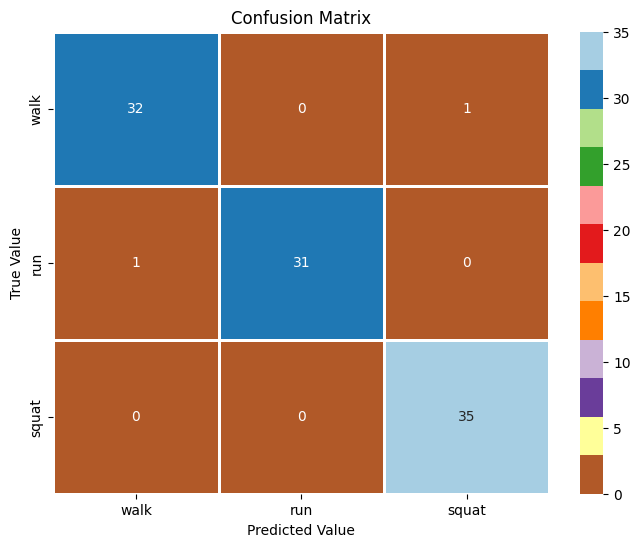

In [171]:
# Створення матриці плутанини
cm = confusion_matrix(y_val, y_pred_new_data)

activity_types = ['walk', 'run', 'squat']

# Візуалізація матриці плутанини з назвами типів активностей
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Paired_r", linewidths=2, linecolor='w', fmt='.0f')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(activity_types)) + 0.5, labels=activity_types)
plt.yticks(ticks=np.arange(len(activity_types)) + 0.5, labels=activity_types)
plt.show()
